In [244]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [224]:
df = pd.read_csv('usedCarListingCleaned.csv')
del df['Unnamed: 0']
print(df.columns)
df=df[df.title != 'Lemon'] # get rid of one record of Lemon car 
df['year'] = df['year'].astype(object)
print(df.shape)
df.head()

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')
(9701, 22)


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,Fusion,SE FWD,Blue Mound,TX,32253,14400,White Platinum Metallic Tri-Coat,Medium Light Stone,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Navigation', 'Backup Camera', 'Cruise Contro...",False,0,Fleet or Mixed Use,Clean,1
1,2007,BMW,6,650i Convertible,Stanton,CA,59664,11499,Mineral Silver Metallic,Tan,...,4.8L V-8 Gas,Automatic,RWD,Gas,[],False,0,Fleet or Mixed Use,Clean,3
2,2019,Kia,Optima,LX,Thornton,CO,4816,18586,Ebony Black,Black,...,2.4L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Lane Keep Assist', 'Blueto...",True,1,Personal or Rental Use,Clean,2
3,2017,Ford,Fusion,SE FWD,Denver,NC,99515,8999,Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2017,Hyundai,Elantra,SE 2.0L Sedan Automatic (alt),Wesley Chapel,FL,117200,6109,Quartz White Pearl,Beige,...,2.0L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth']",False,1,Personal or Rental Use,Clean,1


# 1. Use visualization to compare CA and non-CA car price, CA and TX prices

In [205]:
# Add the treat variable to indicate whether the data is in CA or not.
# Assuming in CA as the treatment group, not in CA as the control group.
df['treat']=(df.state=='CA')
df['cpo'] = df['cpo'].map({True:1, False:0})
df.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner,treat
0,2017,Ford,Fusion,SE FWD,Blue Mound,TX,32253,14400,White Platinum Metallic Tri-Coat,Medium Light Stone,...,Automatic,FWD,Gas,"['Navigation', 'Backup Camera', 'Cruise Contro...",0,0,Fleet or Mixed Use,Clean,1,False
1,2007,BMW,6,650i Convertible,Stanton,CA,59664,11499,Mineral Silver Metallic,Tan,...,Automatic,RWD,Gas,[],0,0,Fleet or Mixed Use,Clean,3,True
2,2019,Kia,Optima,LX,Thornton,CO,4816,18586,Ebony Black,Black,...,Automatic,FWD,Gas,"['Cruise Control', 'Lane Keep Assist', 'Blueto...",1,1,Personal or Rental Use,Clean,2,False
3,2017,Ford,Fusion,SE FWD,Denver,NC,99515,8999,Shadow Black,Black,...,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",0,1,Fleet or Mixed Use,Clean,2,False
4,2017,Hyundai,Elantra,SE 2.0L Sedan Automatic (alt),Wesley Chapel,FL,117200,6109,Quartz White Pearl,Beige,...,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth']",0,1,Personal or Rental Use,Clean,1,False


In [206]:
# The simple comparison of average price is not significantly different, 
# but we would like to use graph to check if this is true
print(df[df.state=='CA']['price'].mean(),df[df.state=='CA']['price'].median())
print(df[df.state!='CA']['price'].mean(),df[df.state!='CA']['price'].median())

14281.348968105065 12899.5
14286.626519976839 12987.0


treat
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

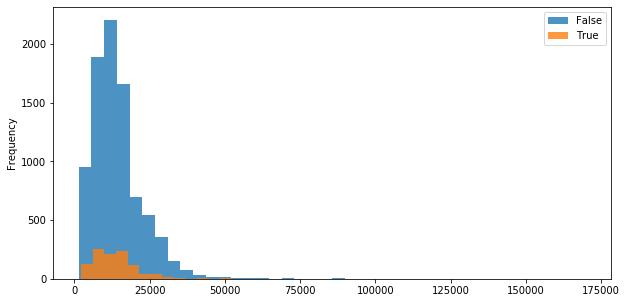

In [207]:
df.groupby('treat')['price'].plot(kind='hist', bins=40, alpha=0.8, legend=True)

This dataset is not a balanced trial. Indeed cars in the control group are very different from cars in the test (treatment) group. Below is a plot of the different mileage distributions

## Is the used car price in Texas different from California?

In [260]:
test = df[df.state=='TX']
control = df[df.state=='CA']
total = pd.concat([test, control])
total.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,Fusion,SE FWD,Blue Mound,TX,32253,14400,White Platinum Metallic Tri-Coat,Medium Light Stone,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Navigation', 'Backup Camera', 'Cruise Contro...",False,0,Fleet or Mixed Use,Clean,1
9,2017,Ford,Fusion,SE FWD,Houston,TX,48524,10466,Shadow Black,Unknown,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Fleet or Mixed Use,Clean,2
41,2009,Nissan,Maxima,3.5 SV,San Marcos,TX,152964,4796,Radiant Silver Metallic,Unknown,...,3.5L V-6 Gas,Automatic,FWD,Gas,[],False,0,Fleet or Mixed Use,Clean,3
58,2014,Mercedes-Benz,CL,CL 550 4MATIC,Addison,TX,44370,33988,Diamond White Metallic,Black,...,4.6L V-8 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,2
98,2013,Hyundai,Elantra,GLS Sedan Automatic,San Marcos,TX,141287,4297,Phantom Black Metallic,Beige,...,1.8L Inline-4 Gas,Automatic,FWD,Gas,"['Front Heated Seats', 'Bluetooth', 'Cruise Co...",False,2,Personal or Rental Use,Clean,1


state
CA    AxesSubplot(0.125,0.125;0.775x0.755)
TX    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

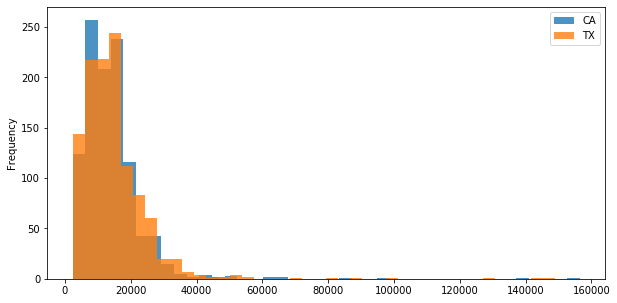

In [261]:
total.groupby('state')['price'].plot(kind='hist', bins=40, alpha=0.8, legend=True)

Seems very similar.

# 2. For similar vehicles, price different or not between CA and non-CA.

# 3. For the same vehicle (same make and model), how does year/mpg impact the price?
